# Portfolio Management with R 

## Introduction:
In this project, I examined the stock prices of Apple, Activision, Microsoft, and IBM. I collected the data via ALPHA VANTAGE API, after which collected data were stored into a DataFrame structure. Some of plots are formed for data visualization. A random portfolio was also established, after which the worth versus time were plotted.

The project has 3 parts:

* [Part 1: Collecting stock data via ALPHA VANTAGE API](#Collecting_data)
* [Part 2: Plotting the price change of stocks and computing their returns](#Plotting_price_changes)
* [Part 3: Establishing a random portfolio and computing the worth over time](#Establishing_portfolios)

<a id="Collecting_data"></a>

## Part 1: Collecting stock data via ALPHA VANTAGE API

Import all relevant packages with updates

In [1]:
install.packages("https://cran.r-project.org/src/contrib/Archive/rlang/rlang_0.4.10.tar.gz", repo=NULL, type="source")

In [2]:
install.packages("tidymodels")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
library(tidyverse)
tidyverse_update(recursive = FALSE, repos = getOption("repos"))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


The following packages are out of date:

• dbplyr        (1.4.3 -> 2.1.1)
• dtplyr        (0 -> 1.1.0)
• forcats       (0.5.0 -> 0.5.1)
• googledrive   (0 -> 2.0.0)
• googlesheets4 (0 -> 1.0.0)
• haven         (2.2.0 -> 2.4.3)
• hms           (0.5.3 -> 1.1.1)
• httr          (1.4.1 -> 1.4.2)
• jsonlite      (1.6.1 -> 1.7.2)
• lubridate     (1.7.8 -> 1.7.10)
• magrittr      (1.5 -> 2.0.1)
• modelr        (0.1.7 -> 0.1.8)
• readr         (1.3.1 -> 2.0.2)
• reprex        (0.3.0 -> 2.0.1)
• rlang         (0.4.10 -> 0.4.11)
• rvest         (0.3.5 -> 1.0.1)

Start a clean R session then run:
install.packages(c("dbplyr", "dtplyr", "forcats", "googledrive", "googlesheets4", 
"haven", "hms", "httr", "jsonlite", "lubridate", "magrittr", 
"modelr", "readr", "reprex", "rlang", "rvest"))


In [4]:
require("httr")
library(httr)

Loading required package: httr


In [5]:
library(glue)


Attaching package: ‘glue’

The following object is masked from ‘package:dplyr’:

    collapse



Begin to collect the data by API

In [6]:
url <- "https://www.alphavantage.co/query?"
api_key <- "OSW0TCH5SD0ZZYRB"
functions <-"TIME_SERIES_DAILY_ADJUSTED"
symbol <- "AAPL"
outputsize <- "full"
datatype <- "json"
query_url <- glue("https://www.alphavantage.co/query?function={functions}&symbol={symbol}&outputsize={outputsize}&apikey={api_key}")
query_url

https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=OSW0TCH5SD0ZZYRB

In [7]:
response <- GET(query_url)
response

Response [https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=OSW0TCH5SD0ZZYRB]
  Date: 2021-09-28 17:46
  Status: 200
  Content-Type: application/json
  Size: 1.86 MB
{
    "Meta Data": {
        "1. Information": "Daily Time Series with Splits and Dividend Events",
        "2. Symbol": "AAPL",
        "3. Last Refreshed": "2021-09-27",
        "4. Output Size": "Full size",
        "5. Time Zone": "US/Eastern"
    },
    "Time Series (Daily)": {
        "2021-09-27": {
...

In [8]:
class(response)

[1] "response"

In [9]:
response_json_result <- content(response, as="parsed")
class(response_json_result)

[1] "list"

In [10]:
results <- response_json_result$'Time Series (Daily)'

In [11]:
results$'1999-11-02'$'5. adjusted close'

[1] "0.615135882727"

In [12]:
names(results[2])

[1] "2021-09-24"

In [13]:
results$'2021-09-23'$'5. adjusted close'

[1] "146.83"

In [14]:
length(results)

[1] 5512

Create an empty `DataFrame`

In [15]:
apple_table <- data.frame("Date"=rep(0,length(results)),"Price"=rep(0,length(results)))

In [16]:
Date=c()
for (i in 1:length(results)){
    date <- names(results[i])
    Date <- c(Date,date)
}
head(apple_table,n=7)

,Date,Price
,<dbl>,<dbl>
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0


In [17]:
Prices <-c()
for (j in results){
    price <- j$'5. adjusted close'
    Prices <- c(Prices,price)
}
head(Prices)

[1] "145.37" "146.92" "146.83" "145.85" "143.43" "142.94"

Insert data into the empty `DataFrame` for `Apple` as an example

In [18]:
apple_table$Date <- as.vector(Date)
apple_table$Price <- as.vector(Prices)
head(apple_table)

,Date,Price
,<chr>,<chr>
1,2021-09-27,145.37
2,2021-09-24,146.92
3,2021-09-23,146.83
4,2021-09-22,145.85
5,2021-09-21,143.43
6,2021-09-20,142.94


In [19]:
apple_table$Date <- as.Date(apple_table$Date)
head(apple_table)

,Date,Price
,<date>,<chr>
1,2021-09-27,145.37
2,2021-09-24,146.92
3,2021-09-23,146.83
4,2021-09-22,145.85
5,2021-09-21,143.43
6,2021-09-20,142.94


Repeat the previous process for all of companies

In [20]:
stock_lists <- c("AAPL"="Apple","ATVI"="Activision","MSFT"="Microsoft","IBM"="IBM")
stock_table <- data.frame("Date"=rep(0,length(results)),"Apple"=rep(0,length(results)),"Activision"=rep(0,length(results)),
                          "Microsoft"=rep(0,length(results)),"IBM"=rep(0,length(results)))
stock_table$Date <- as.vector(Date)
for (i in names(stock_lists)){
    url <- "https://www.alphavantage.co/query?"
    api_key <- "OSW0TCH5SD0ZZYRB"
    functions <-"TIME_SERIES_DAILY_ADJUSTED"
    symbol <- i
    outputsize <- "full"
    datatype <- "json"
    query_url <- glue("https://www.alphavantage.co/query?function={functions}&symbol={symbol}&outputsize={outputsize}&apikey={api_key}")
    response <- GET(query_url)
    response_json_result <- content(response, as="parsed")
    results <- response_json_result$'Time Series (Daily)'
    Stock_Prices <-c()
    for (j in results){
        price <- j$'5. adjusted close'
        Stock_Prices <- c(Stock_Prices,price)
    }
    stock_table[stock_lists[i]]<- Stock_Prices
}
head(stock_table,n=12)

,Date,Apple,Activision,Microsoft,IBM
,<chr>,<chr>,<chr>,<chr>,<chr>
1,2021-09-27,145.37,75.08,294.17,138.56
2,2021-09-24,146.92,75.26,299.35,137.49
3,2021-09-23,146.83,74.67,299.56,136.73
4,2021-09-22,145.85,72.81,298.58,134.63
5,2021-09-21,143.43,73.03,294.8,132.97
6,2021-09-20,142.94,76.18,294.3,134.31
7,2021-09-17,146.06,79.56,299.87,135.23
8,2021-09-16,148.79,79.28,305.22,136.43
9,2021-09-15,149.03,78.25,304.82,137.2


Sort the `Date` in the ascending order

In [21]:
stock_table_arranged <- stock_table %>%
                        arrange(Date)
stock_table_arranged

Date,Apple,Activision,Microsoft,IBM
<chr>,<chr>,<chr>,<chr>,<chr>
1999-11-01,0.594976289312,1.04506805712,29.2744922277,59.358271344
1999-11-02,0.615135882727,1.05919059843,29.3347082451,58.1680383062
1999-11-03,0.624717438533,1.07777288963,29.1572294571,57.8980885451
1999-11-04,0.640967757179,1.08669238941,29.0779978553,56.1740912068
1999-11-05,0.676917754562,1.14318255466,29.017781838,55.3703771452
1999-11-08,0.738699626398,1.18926663684,28.5043610584,57.7078966679
1999-11-09,0.686959225047,1.15656180432,28.1652498027,57.5113187785
1999-11-10,0.7009099703,1.12906001335,27.6106285902,59.5876727357
1999-11-11,0.707118818462,1.10081493072,28.4029446081,58.3590609267


Convert to the correct data type for all columns

In [22]:
stock_table$Date <- as.Date(stock_table$Date)
stock_table$Apple <- as.numeric(stock_table$Apple)
stock_table$Activision <- as.numeric(stock_table$Activision)
stock_table$Microsoft <- as.numeric(stock_table$Microsoft)
stock_table$IBM <- as.numeric(stock_table$IBM)
head(stock_table,n=12)

,Date,Apple,Activision,Microsoft,IBM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2021-09-27,145.37,75.08,294.17,138.56
2,2021-09-24,146.92,75.26,299.35,137.49
3,2021-09-23,146.83,74.67,299.56,136.73
4,2021-09-22,145.85,72.81,298.58,134.63
5,2021-09-21,143.43,73.03,294.80,132.97
6,2021-09-20,142.94,76.18,294.30,134.31
7,2021-09-17,146.06,79.56,299.87,135.23
8,2021-09-16,148.79,79.28,305.22,136.43
9,2021-09-15,149.03,78.25,304.82,137.20


In [23]:
stock_table_arranged$Date <- as.Date(stock_table_arranged$Date)
stock_table_arranged$Apple <- as.numeric(stock_table_arranged$Apple)
stock_table_arranged$Activision <- as.numeric(stock_table_arranged$Activision)
stock_table_arranged$Microsoft <- as.numeric(stock_table_arranged$Microsoft)
stock_table_arranged$IBM <- as.numeric(stock_table_arranged$IBM)
head(stock_table_arranged,n=9)

,Date,Apple,Activision,Microsoft,IBM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1999-11-01,0.5949763,1.045068,29.27449,59.35827
2,1999-11-02,0.6151359,1.059191,29.33471,58.16804
3,1999-11-03,0.6247174,1.077773,29.15723,57.89809
4,1999-11-04,0.6409678,1.086692,29.07800,56.17409
5,1999-11-05,0.6769178,1.143183,29.01778,55.37038
6,1999-11-08,0.7386996,1.189267,28.50436,57.70790
7,1999-11-09,0.6869592,1.156562,28.16525,57.51132
8,1999-11-10,0.7009100,1.129060,27.61063,59.58767
9,1999-11-11,0.7071188,1.100815,28.40294,58.35906


Save the resulting `DataFrames` into **csv** files

In [24]:
write.csv(stock_table, "Stock Price Table.csv")

In [25]:
write.csv(stock_table_arranged, "Arranged Stock Price Table.csv")

<a id="Plotting_price_changes"></a>

## Part 2: Plotting the price change of stocks and computing their returns

Plot the change of stock prices of Apple over time

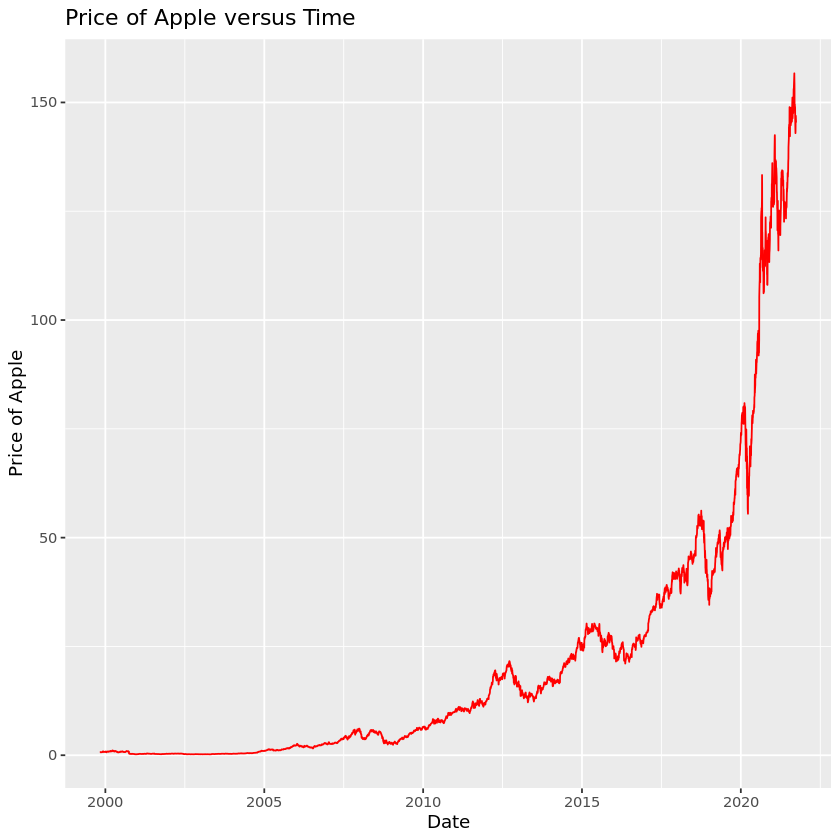

In [26]:
ggplot(stock_table,aes(Date,Apple))+
geom_line(color="red")+
labs(x="Date",y="Price of Apple",title="Price of Apple versus Time")

Plot the price changes of all stocks in 2 ways

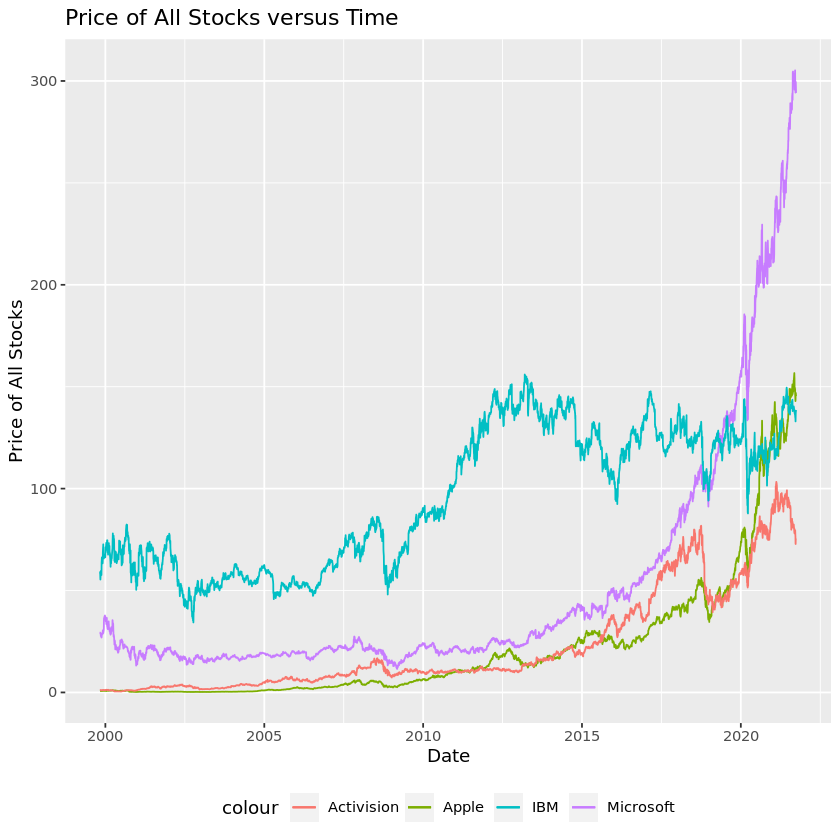

In [27]:
ggplot(data=stock_table_arranged,aes(x=Date))+
geom_line(aes(y=Apple,color="Apple"))+
geom_line(aes(y=Activision,color="Activision"))+
geom_line(aes(y=Microsoft,color="Microsoft"))+
geom_line(aes(y=IBM,color="IBM"))+
labs(x="Date",y="Price of All Stocks",title="Price of All Stocks versus Time")+
theme(legend.position = "bottom")

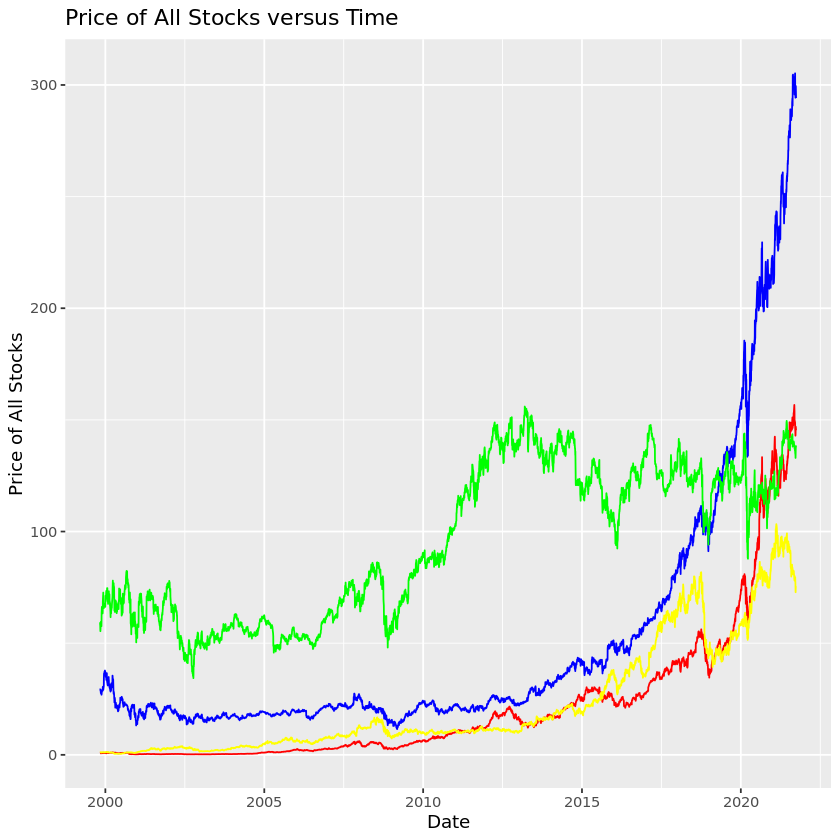

In [28]:
ggplot(data=stock_table_arranged,aes(x=Date))+
geom_line(aes(y=Apple),color="red")+
geom_line(aes(y=Activision),color="yellow")+
geom_line(aes(y=Microsoft),color="blue")+
geom_line(aes(y=IBM),color="green")+
labs(x="Date",y="Price of All Stocks",title="Price of All Stocks versus Time")

Create an empty `DataFrame` called `return_table` and compute the return

In [29]:
return_table <- data.frame(stock_table_arranged)
return_table

Date,Apple,Activision,Microsoft,IBM
<date>,<dbl>,<dbl>,<dbl>,<dbl>
1999-11-01,0.5949763,1.045068,29.27449,59.35827
1999-11-02,0.6151359,1.059191,29.33471,58.16804
1999-11-03,0.6247174,1.077773,29.15723,57.89809
1999-11-04,0.6409678,1.086692,29.07800,56.17409
1999-11-05,0.6769178,1.143183,29.01778,55.37038
1999-11-08,0.7386996,1.189267,28.50436,57.70790
1999-11-09,0.6869592,1.156562,28.16525,57.51132
1999-11-10,0.7009100,1.129060,27.61063,59.58767
1999-11-11,0.7071188,1.100815,28.40294,58.35906


Sort the `return_table` by date in the ascending order

In [30]:
return_table <- return_table %>%
            filter(Date!=as.Date("1999-11-01"))
return_table

Date,Apple,Activision,Microsoft,IBM
<date>,<dbl>,<dbl>,<dbl>,<dbl>
1999-11-02,0.6151359,1.059191,29.33471,58.16804
1999-11-03,0.6247174,1.077773,29.15723,57.89809
1999-11-04,0.6409678,1.086692,29.07800,56.17409
1999-11-05,0.6769178,1.143183,29.01778,55.37038
1999-11-08,0.7386996,1.189267,28.50436,57.70790
1999-11-09,0.6869592,1.156562,28.16525,57.51132
1999-11-10,0.7009100,1.129060,27.61063,59.58767
1999-11-11,0.7071188,1.100815,28.40294,58.35906
1999-11-12,0.6946245,1.045068,28.26667,58.89351


In [31]:
nrow(return_table)

[1] 5511

In [32]:
ncol(return_table)

[1] 5

Compute the return and export to **csv** file

In [33]:
for (i in 1:nrow(return_table)){
    for (j in 2:ncol(return_table)){
        return_table[c(i),c(j)] <- stock_table_arranged[c(i+1),c(j)]/stock_table_arranged[c(i),c(j)]-1
    }
}
head(return_table)

,Date,Apple,Activision,Microsoft,IBM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1999-11-02,0.03388302,0.013513514,0.002056945,-0.020051680
2,1999-11-03,0.01557632,0.017543860,-0.006050130,-0.004640861
3,1999-11-04,0.02601227,0.008275862,-0.002717391,-0.029776412
4,1999-11-05,0.05608706,0.051983584,-0.002070845,-0.014307558
5,1999-11-08,0.09126939,0.040312094,-0.017693316,0.042216066
6,1999-11-09,-0.07004254,-0.027500000,-0.011896820,-0.003406430


In [34]:
write.csv(return_table, "Return Table.csv")

Plot the counts of returns of `Apple` and `IBM`

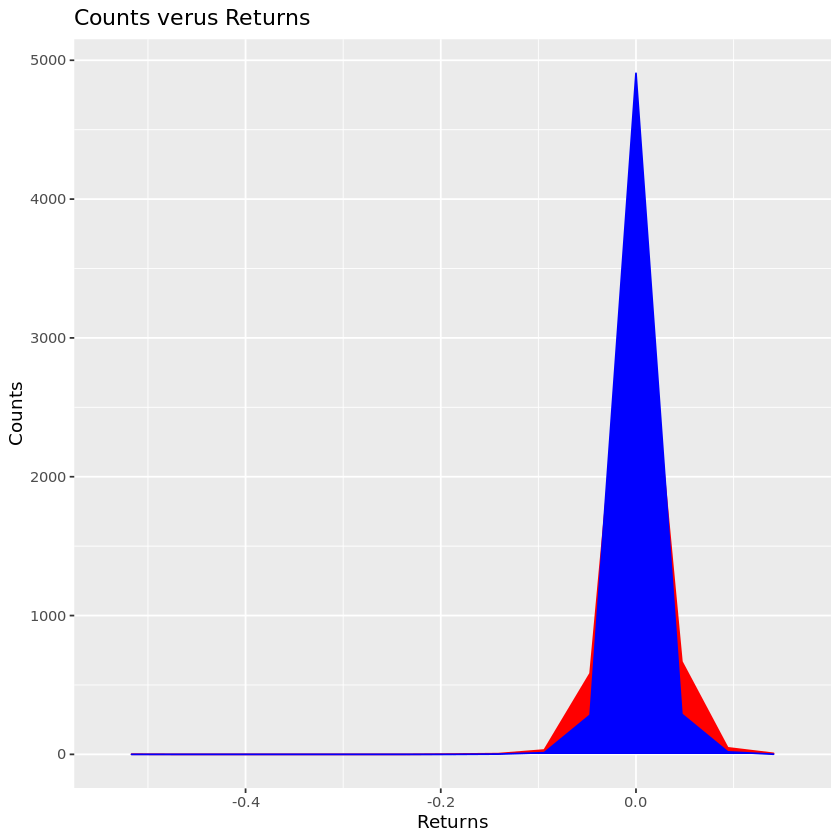

In [35]:
ggplot(return_table,aes())+
geom_area(aes(x=Apple),stat="bin",bins=15,color="red",fill="red",position=position_stack(reverse = TRUE))+
geom_area(aes(x=IBM),stat="bin",bins=15,color="blue",fill="blue")+
labs(x="Returns",y="Counts",title="Counts verus Returns")+
theme(legend.position = "bottom")

In [36]:
x <- return_table['Apple'][c(1),]
class(x)

[1] "numeric"

<a id="Establishing_portfolios"></a>

## Part 3: Establishing a random portfolio and computing the worth over time

Normalize the stock price

In [37]:
normalized_stock_price_table <- data.frame(stock_table_arranged)
stock_list <- c("Apple","Activision","Microsoft","IBM") 
for (i in stock_list){
    ini_price <- as.numeric(normalized_stock_price_table[i][c(1),])
    normalized_stock_price_table[i] <- normalized_stock_price_table[i]/ini_price
                            
}
head(normalized_stock_price_table,n=18)

,Date,Apple,Activision,Microsoft,IBM
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1999-11-01,1.000000,1.0000000,1.0000000,1.0000000
2,1999-11-02,1.033883,1.0135135,1.0020569,0.9799483
3,1999-11-03,1.049987,1.0312945,0.9959944,0.9754005
4,1999-11-04,1.077300,1.0398293,0.9932879,0.9463566
5,1999-11-05,1.137722,1.0938834,0.9912309,0.9328165
6,1999-11-08,1.241561,1.1379801,0.9736928,0.9721964
7,1999-11-09,1.154599,1.1066856,0.9621089,0.9688847
8,1999-11-10,1.178047,1.0803698,0.9431634,1.0038647
9,1999-11-11,1.188482,1.0533428,0.9702284,0.9831665


In [38]:
write.csv(normalized_stock_price_table,"Normalized Stock Price Table.csv")

In [39]:
sample_portfolio_worth <- data.frame("Date"=normalized_stock_price_table$Date,"Worth"=rep(0,nrow(normalized_stock_price_table)))
head(sample_portfolio_worth)

,Date,Worth
,<date>,<dbl>
1,1999-11-01,0
2,1999-11-02,0
3,1999-11-03,0
4,1999-11-04,0
5,1999-11-05,0
6,1999-11-08,0


Formulate the initial worth and a random portfolio

In [40]:
ini_worth <- 10000
portfolio <- c(10,20,30,40)
portfolio <- portfolio/sum(portfolio)
portfolio

[1] 0.1 0.2 0.3 0.4

Compute the worth of the portfolio in 2 ways

In [41]:
for (i in 1:nrow(sample_portfolio_worth)){
    sample_portfolio_worth[c(i),c(2)]<- (portfolio[1]*normalized_stock_price_table[c(i),2]+portfolio[2]*normalized_stock_price_table[c(i),3]+
    portfolio[3]*normalized_stock_price_table[c(i),4]+portfolio[4]*normalized_stock_price_table[c(i),5])*ini_worth
}
head(sample_portfolio_worth,n=8)

,Date,Worth
,<date>,<dbl>
1,1999-11-01,10000.000
2,1999-11-02,9986.874
3,1999-11-03,10002.161
4,1999-11-04,9922.248
5,1999-11-05,10030.448
6,1999-11-08,10327.385
7,1999-11-09,10129.836
8,1999-11-10,10183.735


In [42]:
sample_portfolio_worth_copy <- data.frame(sample_portfolio_worth)
for (i in 1:nrow(sample_portfolio_worth_copy)){
    worth <- 0
    for (j in 1:4){
        worth <- worth + ini_worth*portfolio[j]*normalized_stock_price_table[c(i),j+1]
    }
    sample_portfolio_worth_copy[c(i),c(2)]<- worth
}
head(sample_portfolio_worth_copy,n=8)

,Date,Worth
,<date>,<dbl>
1,1999-11-01,10000.000
2,1999-11-02,9986.874
3,1999-11-03,10002.161
4,1999-11-04,9922.248
5,1999-11-05,10030.448
6,1999-11-08,10327.385
7,1999-11-09,10129.836
8,1999-11-10,10183.735


Plot the portfolio worth versus time

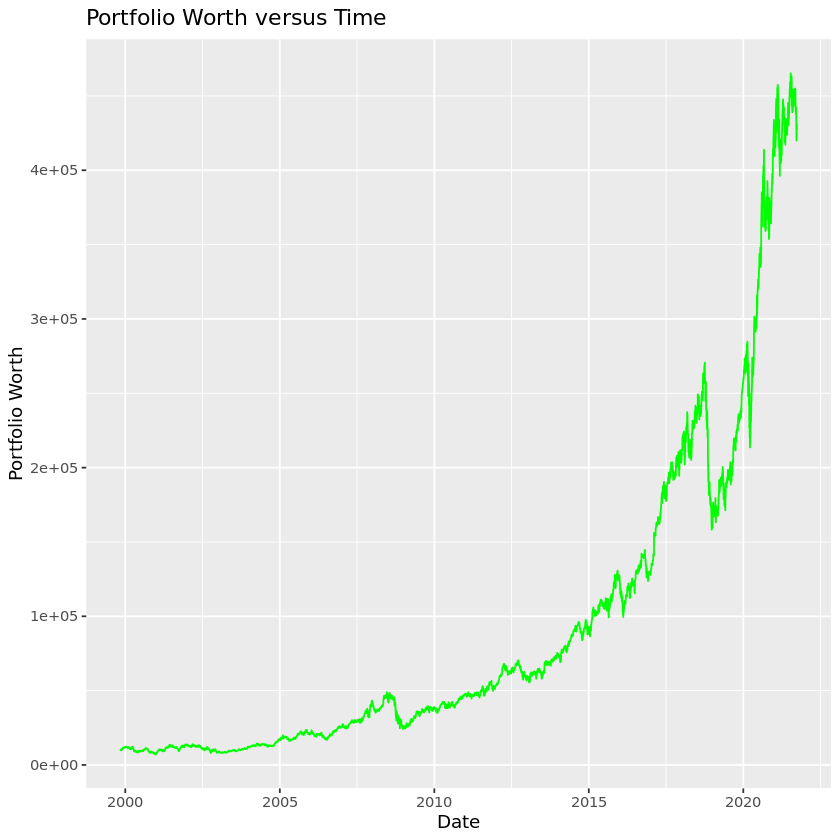

In [43]:
ggplot(data=sample_portfolio_worth_copy,aes(x=Date,y=Worth))+
geom_line(color="green")+
labs(x="Date",y="Portfolio Worth",title="Portfolio Worth versus Time")

# Thanks for reading